In [ ]:
import numpy as np
import math
import os,sys,inspect
import random
import matplotlib.pyplot as plt
import pandas as pd

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from Algorithm_2 import Algorithm_2, GetCoFromEigen
from Algorithm_3 import Algorithm_3
from func.Select_Index import Select_Columns, Select_Rows, Select_Ind
from func.Summation_Alg import GetCoFromEigen

import itertools 
from itertools import combinations, chain 

def findsubsets(r, n): 
    s = range(0, n)
    return list(itertools.combinations(s, r)) 

def Check_Best_CUR(A, k):
    
    ans = math.inf
    columns = []
    rows = []
    
    m = A.shape[0]
    n = A.shape[1]
    
    Cols = findsubsets(k, n)
    Rows = findsubsets(k, m)
    
    for col__ in Cols:
        for row__ in Rows:
            
            col = list(col__)
            row = list(row__)
            
            C  = Select_Columns(A, col)
            R  = Select_Rows(A, row)
            U = np.linalg.pinv(C) @ A @ np.linalg.pinv(R)
            
            norm = np.linalg.norm(A - C @ U @ R,'fro')
            if(norm < ans):
                ans = norm
                columns = col
                rows = row
            
    return ans, columns, rows

In [ ]:
def GetSparse(m, n, dens, a, b, distr):
    A = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            if random.random() < dens:
                A[i][j] = distr(a, b)
    return A

In [3]:
m = 20
n = 30
dens = 0.2

A = GetSparse(m,n,dens,-1,1,np.random.uniform)

arrKS21 = []
arrES21 = []
arrTS21 = []

arrKS31 = []
arrES31 = []
arrTS31 = []


        
            
for k in range(10,20):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS21.append(k)
    time = end - start
    arrTS21.append(time.total_seconds())
    arrES21.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(10,20):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS31.append(k)
    time = end - start
    arrTS31.append(time.total_seconds())
    arrES31.append(np.linalg.norm(A - C@U@R, 'fro'))
dens = 0.05

A = GetSparse(m,n,dens,-1,1,np.random.uniform)

arrKS22 = []
arrES22 = []
arrTS22 = []

arrKS32 = []
arrES32 = []
arrTS32 = []


        
            
for k in range(10,20):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_2(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS22.append(k)
    time = end - start
    arrTS22.append(time.total_seconds())
    arrES22.append(np.linalg.norm(A - C@U@R, 'fro'))
    
for k in range(10,20):
    start = pd.Timestamp.now()
    C, U, R ,Cs, Rs = Algorithm_3(A, k)
    end = pd.Timestamp.now()
    print(k)
    arrKS32.append(k)
    time = end - start
    arrTS32.append(time.total_seconds())
    arrES32.append(np.linalg.norm(A - C@U@R, 'fro'))

10


/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_2.py:54: RuntimeWarning: overflow encountered in cdouble_scalars
  ratio = up/down
/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_2.py:54: RuntimeWarning: invalid value encountered in cdouble_scalars
  ratio = up/down


11
12
13
14
15
16
17
18
19
10


/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_3.py:71: RuntimeWarning: overflow encountered in cdouble_scalars
  r = up/down
/home/zyl/GitKraken_Active/Low-Rank-approx_project/Algorithm_3.py:71: RuntimeWarning: invalid value encountered in cdouble_scalars
  r = up/down


11
12
13
14
15


/home/zyl/GitKraken_Active/Low-Rank-approx_project/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]
/home/zyl/GitKraken_Active/Low-Rank-approx_project/func/Summation_Alg.py:18: RuntimeWarning: invalid value encountered in multiply
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


16


/home/zyl/GitKraken_Active/Low-Rank-approx_project/func/Summation_Alg.py:18: RuntimeWarning: overflow encountered in cdouble_scalars
  S[i, j] = S[i-1, j] + eigen[i]*S[i-1,j-1]


17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19


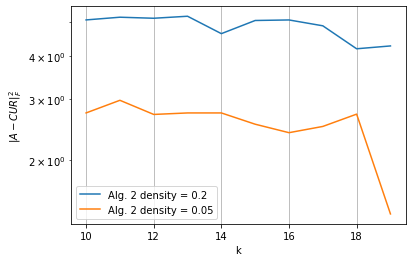

In [10]:
fig = plt.figure()
plt.plot(arrKS21,arrES21, label = "Alg. 2 density = 0.2")
plt.plot(arrKS22,arrES22, label = "Alg. 2 density = 0.05")
plt.legend()

plt.yscale('log')
plt.ylabel("$ \|A - CUR\|_F^2$")
plt.xlabel("k")
plt.grid()
plt.savefig('err_A2_Sparse.pdf', dpi=300)
plt.show()

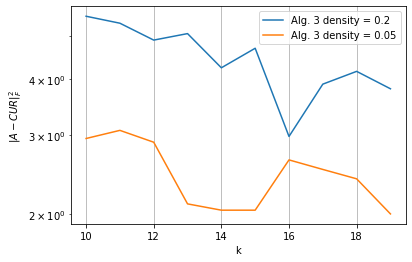

In [11]:
fig = plt.figure()
plt.plot(arrKS31,arrES31, label = "Alg. 3 density = 0.2")
plt.plot(arrKS32,arrES32, label = "Alg. 3 density = 0.05")
plt.legend()

plt.yscale('log')
plt.ylabel("$ \|A - CUR\|_F^2$")
plt.xlabel("k")
plt.grid()
plt.savefig('err_A3_Sparse.pdf', dpi=300)
plt.show()